In [2]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 

In [3]:
iris = datasets.load_iris()

iris_data = iris.data
iris_label = iris.target

print(pd.DataFrame(data=iris['data'], columns=iris['feature_names']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label, test_size=0.2, shuffle=True)

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [5]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data,train_label)
predicted = classifier.predict(test_data)
[print("predict / true : %s / %s" % (str(predicted[i]), str(test_label[i]))) for i in range(len(predicted))]


predict / true : 0 / 0
predict / true : 1 / 1
predict / true : 1 / 1
predict / true : 0 / 0
predict / true : 1 / 1
predict / true : 2 / 2
predict / true : 2 / 2
predict / true : 1 / 1
predict / true : 0 / 0
predict / true : 1 / 1
predict / true : 1 / 1
predict / true : 2 / 2
predict / true : 0 / 0
predict / true : 2 / 2
predict / true : 1 / 1
predict / true : 0 / 0
predict / true : 2 / 2
predict / true : 1 / 1
predict / true : 0 / 0
predict / true : 1 / 1
predict / true : 0 / 0
predict / true : 0 / 0
predict / true : 0 / 0
predict / true : 0 / 0
predict / true : 1 / 2
predict / true : 2 / 1
predict / true : 2 / 2
predict / true : 0 / 0
predict / true : 0 / 0
predict / true : 1 / 1


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

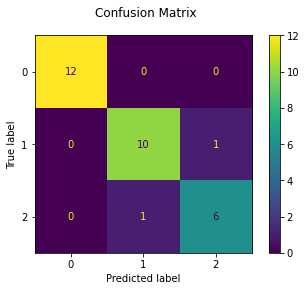

In [6]:
# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [7]:
# Accuracy, Precision, Recall, F1-score
print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )


Classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30




In [9]:
# 5 different n_neighbors : 3, 7, 9, 11, 13
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_data,train_label)
predicted = classifier.predict(test_data)
print(f"Classifier {classifier} n_neighbor = 3 :\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )


classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(train_data,train_label)
predicted = classifier.predict(test_data)
print(f"Classifier {classifier} n_neighbor = 7 :\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )


classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(train_data,train_label)
predicted = classifier.predict(test_data)
print(f"Classifier {classifier} n_neighbor = 9 :\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )


classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(train_data,train_label)
predicted = classifier.predict(test_data)
print(f"Classifier {classifier} n_neighbor = 11 :\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )


classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(train_data,train_label)
predicted = classifier.predict(test_data)
print(f"Classifier {classifier} n_neighbor = 13 :\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classifier KNeighborsClassifier(n_neighbors=3) n_neighbor = 3 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Classifier KNeighborsClassifier(n_neighbors=7) n_neighbor = 7 :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.91      0.87        11
           2       0.83      0.71      0.77         7

    accuracy                           0.90        30
   macro avg       0.89      0.87      0.88        30
weighted avg       0.90      0.90      0.90        30


Classifier KNeighborsClassifier(n_neighbors=9) n_neighbor = 9 :
              precision    recall  f1-score 

In [20]:
# SVM
from sklearn import svm

classifier = svm.SVC(gamma=0.01)
classifier.fit(train_data, train_label)

predicted = classifier.predict(test_data)

print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

classifier = svm.SVC(gamma=0.1)
classifier.fit(train_data, train_label)

predicted = classifier.predict(test_data)

print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classifier SVC(gamma=0.01):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Classifier SVC(gamma=0.1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.73      0.76        11
           2       0.62      0.71      0.67         7

    accuracy                           0.83        30
   macro avg       0.81      0.81      0.81        30
weighted avg       0.84      0.83      0.83        30




In [24]:
# Decision Trees
from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(train_data, train_label)

predicted = classifier.predict(test_data)

print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

classifier = tree.DecisionTreeClassifier(max_depth=4)
classifier.fit(train_data, train_label)

predicted = classifier.predict(test_data)

print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classifier DecisionTreeClassifier(max_depth=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.82      0.82        11
           2       0.71      0.71      0.71         7

    accuracy                           0.87        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.87      0.87      0.87        30


Classifier DecisionTreeClassifier(max_depth=4):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.91      0.87        11
           2       0.83      0.71      0.77         7

    accuracy                           0.90        30
   macro avg       0.89      0.87      0.88        30
weighted avg       0.90      0.90      0.90        30




In [31]:
# Logistic regression

from sklearn import linear_model

classifier = linear_model.LogisticRegression(penalty="l2", C=1)
classifier.fit(train_data, train_label)

predicted = classifier.predict(test_data)

print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

classifier = linear_model.LogisticRegression(penalty="l2", C=2)
classifier.fit(train_data, train_label)

predicted = classifier.predict(test_data)

print(f"Classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classifier LogisticRegression(C=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.82      0.86        11
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30


Classifier LogisticRegression(C=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.73      0.80        11
           2       0.67      0.86      0.75         7

    accuracy                           0.87        30
   macro avg       0.85      0.86      0.85        30
weighted avg       0.88      0.87      0.87        30


